In [2]:
import json
import requests
import json
import pandas as pd
import numpy as np
from io import StringIO
import tweepy as tp
import csv
import re
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from matplotlib.widgets import  Slider, Button
%matplotlib inline




In [44]:
response=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')


In [43]:
file= StringIO(response.text)
reader=csv.reader(file)
data=list(reader)
for row in data[1:]:
    print(row)

['666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue']
['666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue']
['666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue']
['666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue']
['666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue']
['666050758794694657\thttps://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg\t1\tBernese_mountain_dog\t0.651137\tTrue\tEnglish_

['747512671126323200\thttps://pbs.twimg.com/media/Cl-yykwWkAAqUCE.jpg\t1\tCardigan\t0.11149300000000001\tTrue\tmalinois\t0.0950892\tTrue\tGerman_shepherd\t0.0801456\tTrue']
['747594051852075008\thttps://pbs.twimg.com/media/Cl_80k5WkAEbo9m.jpg\t1\tbasenji\t0.38913600000000004\tTrue\tdingo\t0.270226\tFalse\tChihuahua\t0.09893880000000001\tTrue']
['747600769478692864\thttps://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg\t1\tChesapeake_Bay_retriever\t0.804363\tTrue\tWeimaraner\t0.0544311\tTrue\tLabrador_retriever\t0.043267599999999996\tTrue']
['747816857231626240\thttps://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg\t1\tPembroke\t0.7689229999999999\tTrue\tChihuahua\t0.029053\tTrue\tShetland_sheepdog\t0.029035400000000003\tTrue']
['747844099428986880\thttps://pbs.twimg.com/media/CmDgPTsWEAIi2T1.jpg\t1\tPembroke\t0.360428\tTrue\tpapillon\t0.26313400000000003\tTrue\tChihuahua\t0.131246\tTrue']
['747885874273214464\thttps://pbs.twimg.com/media/CmEGMSvUYAAl3ZM.jpg\t1\tkuvasz\t0.40845\tTrue\tSamoyed\t0.14

['870063196459192321\thttps://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg\t1\tcomic_book\t0.534409\tFalse\tenvelope\t0.28072199999999997\tFalse\tbook_jacket\t0.043785500000000005\tFalse']
['870308999962521604\thttps://pbs.twimg.com/media/DBP1asiUAAEKZI5.jpg\t2\tGreater_Swiss_Mountain_dog\t0.6227520000000001\tTrue\tAppenzeller\t0.15846300000000002\tTrue\tEntleBucher\t0.148115\tTrue']
['870374049280663552\thttps://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg\t1\tgolden_retriever\t0.841001\tTrue\tGreat_Pyrenees\t0.0992784\tTrue\tLabrador_retriever\t0.0326213\tTrue']
['870656317836468226\thttps://pbs.twimg.com/media/DBUxSSTXsAA-Jn1.jpg\t4\tPembroke\t0.9454950000000001\tTrue\tCardigan\t0.0458755\tTrue\tbeagle\t0.00432943\tTrue']
['870804317367881728\thttps://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg\t1\thome_theater\t0.16829000000000002\tFalse\tsandbar\t0.0980404\tFalse\ttelevision\t0.07972939999999999\tFalse']
['871032628920680449\thttps://pbs.twimg.com/media/DBaHi3YXgAE6knM.jpg\t1\tkelpie\t0.3980530

In [126]:
with open('dog.tsv', 'w', newline='',  encoding='utf-8') as f:
            writer= csv.writer(f)
            writer.writerow(['tweet_id',  'jpg_url',   'img_num',  'p1', 'p1_conf', 'p1_dog',  'p2', 'p2_conf',  'p2_dog', 'p3', 'p3_conf', 'p3_dog'])
            writer.writerows(data[1:])
               
            
             
                



In [820]:
with open('dog.tsv', 'r') as myfile:
    with open('image-predictions.csv', 'w') as csv_file:
        for line in myfile:
            filecontent= re.sub("\t", ",", line)
            csv_file.write(filecontent)

In [3]:
## read and make a copy of the dataset
image_df= pd.read_csv('image-predictions.csv')
image_df2= image_df.copy()
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
## read and copy the data
twitter_dogs= pd.read_csv('twitter-archive-enhanced.csv')
twitter_dogs2= twitter_dogs.copy()
twitter_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
archive= twitter_dogs
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
archive2= archive[1811:]
archive2

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1811,676819651066732545,NaN,NaN,2015-12-15 17:42:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Watch out Airbud. This pupper is also good at ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676819651...,12,10,None,None,None,pupper,None
1812,676811746707918848,NaN,NaN,2015-12-15 17:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Penny &amp; Gizmo. They are pract...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676811746...,9,10,Penny,None,None,None,None
1813,676776431406465024,NaN,NaN,2015-12-15 14:50:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","When someone yells ""cops!"" at a party and you ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/676776431...,10,10,None,None,None,None,None
1814,676617503762681856,NaN,NaN,2015-12-15 04:19:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I promise this wasn't meant to be a cuteness o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676617503...,13,10,None,None,None,pupper,None
1815,676613908052996102,NaN,NaN,2015-12-15 04:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the saddest/sweetest/best picture I've...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676613908...,12,10,the,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [529]:
consumer_key = '*************'
consumer_secret = '********************'
access_token = '*******************************'
access_secret = '*****************************************'

auth = tp.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)




In [11]:


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file


api = tp.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tp.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Fail
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 886054160059072513


Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Fail
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Fail
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success
294: 8

Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Fail
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 7

Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
10

Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
13

Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
15

Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
18

Fail
2054: 671485057807351808
Fail
2055: 671390180817915904
Fail
2056: 671362598324076544
Fail
2057: 671357843010908160
Fail
2058: 671355857343524864
Fail
2059: 671347597085433856
Fail
2060: 671186162933985280
Fail
2061: 671182547775299584
Fail
2062: 671166507850801152
Fail
2063: 671163268581498880
Fail
2064: 671159727754231808
Fail
2065: 671154572044468225
Fail
2066: 671151324042559489
Fail
2067: 671147085991960577
Fail
2068: 671141549288370177
Fail
2069: 671138694582165504
Fail
2070: 671134062904504320
Fail
2071: 671122204919246848
Fail
2072: 671115716440031232
Fail
2073: 671109016219725825
Fail
2074: 670995969505435648
Fail
2075: 670842764863651840
Fail
2076: 670840546554966016
Fail
2077: 670838202509447168
Fail
2078: 670833812859932673
Fail
2079: 670832455012716544
Fail
2080: 670826280409919488
Fail
2081: 670823764196741120
Fail
2082: 670822709593571328
Fail
2083: 670815497391357952
Fail
2084: 670811965569282048
Fail
2085: 670807719151067136
Fail
2086: 670804601705242624
Fail
2087:

2338: 666268910803644416
Fail
2339: 666104133288665088
Fail
2340: 666102155909144576
Fail
2341: 666099513787052032
Fail
2342: 666094000022159362
Fail
2343: 666082916733198337
Fail
2344: 666073100786774016
Fail
2345: 666071193221509120
Fail
2346: 666063827256086533
Fail
2347: 666058600524156928
Fail
2348: 666057090499244032
Fail
2349: 666055525042405380
Fail
2350: 666051853826850816
Fail
2351: 666050758794694657
Fail
2352: 666049248165822465
Fail
2353: 666044226329800704
Fail
2354: 666033412701032449
Fail
2355: 666029285002620928
Fail
2356: 666020888022790149
Fail
4013.875973800001
{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.'), 887473957103951883: TweepyException("Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)"), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.'), 872668790621863937: NotFound('404 Not Found\n144 - No status found with that ID.'), 872261

In [24]:


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file


api = tp.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive2.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 1811
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json2.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tp.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
1833: 676191832485810177
Fail
1834: 676146341966438401
Success
1835: 676121918416756736
Success
1836: 676101918813499392
Success
1837: 676098748976615425
Success
1838: 676089483918516224
Success
1839: 675898130735476737
Success
1840: 675891555769696257
Success
1841: 675888385639251968
Success
1842: 6758781

Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
2081: 670823764196741120
Success
2082: 670822709593571328
Success
2083: 670815497391357952
Success
2084: 670811965569282048
Success
2085: 670807719151067136
Success
2086: 670804601705242624
Success
2087: 670803562457407488
Success
2088: 670797304698376195
Success
2089: 670792680469889025
Success
2090: 670789397210615808
Success
2091: 670786190031921152
Success
20

Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
2330: 666373753744588802
Success
2331: 666362758909284353
Success
2332: 666353288456101888
Success
2333: 666345417576210432
Success
2334: 666337882303524864
Success
2335: 666293911632134144
Success
2336: 666287406224695296
Success
2337: 666273097616637952
Success
2338: 666268910803644416
Success
2339: 666104133288665088
Success
2340: 666102155909144576
Success
23

In [8]:
WeRateDogs_list=[]
with open('tweet_json.txt', 'r') as tweet_data:
    for line in tweet_data:
        data=json.loads(line)
        tweet_id=data['id']
        created_at= data['created_at']
        favorite_count=data['favorite_count']
        retweet_count= data['retweet_count']
        WeRateDogs_list.append({ 'tweet_id': tweet_id,
                                 'date_created': created_at,
                                 'favorite_count': favorite_count,
                                 'retweet_count' : retweet_count  })
twitter_df= pd.DataFrame(WeRateDogs_list, columns=['tweet_id', 'date_created', 'favorite_count', 'retweet_count'])

In [9]:
twitter_df1= twitter_df.copy()

In [10]:
twitter_df1

,tweet_id,date_created,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,33671,6962
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29212,5268
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,21951,3463
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,36763,7190
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,35160,7709
...,...,...,...,...
1776,669942763794931712,Thu Nov 26 18:16:16 +0000 2015,443,131
1777,669926384437997569,Thu Nov 26 17:11:11 +0000 2015,337,81
1778,669923323644657664,Thu Nov 26 16:59:01 +0000 2015,202,50
1779,669753178989142016,Thu Nov 26 05:42:55 +0000 2015,704,339


In [11]:
WeRateDogs_list2=[]
with open('tweet_json2.txt', 'r') as tweet_data1:
    for line in tweet_data1:
        data=json.loads(line)
        tweet_id=data['id']
        created_at= data['created_at']
        favorite_count=data['favorite_count']
        retweet_count= data['retweet_count']
        WeRateDogs_list2.append({ 'tweet_id': tweet_id,
                                 'date_created': created_at,
                                 'favorite_count': favorite_count,
                                 'retweet_count' : retweet_count  })
twitter_df2= pd.DataFrame(WeRateDogs_list2, columns=['tweet_id', 'date_created', 'favorite_count', 'retweet_count'])

In [12]:
twitter_df2

,tweet_id,date_created,favorite_count,retweet_count
0,676819651066732545,Tue Dec 15 17:42:34 +0000 2015,1651,598
1,676811746707918848,Tue Dec 15 17:11:09 +0000 2015,1302,378
2,676776431406465024,Tue Dec 15 14:50:49 +0000 2015,4505,1794
3,676617503762681856,Tue Dec 15 04:19:18 +0000 2015,2607,852
4,676613908052996102,Tue Dec 15 04:05:01 +0000 2015,983,174
...,...,...,...,...
528,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,88,36
529,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,246,114
530,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,100,36
531,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,112,39


In [13]:
twitter_df3= twitter_df2.copy()

In [14]:
## concatenate the 2 dataframes twitter_df1 and twitter_df3
frames=[twitter_df1, twitter_df3]
Twitter_df=pd.concat(frames)
Twitter_df2= Twitter_df.copy()

In [15]:
Twitter_df.sample(9)

,tweet_id,date_created,favorite_count,retweet_count
1369,699413908797464576,Tue Feb 16 02:04:04 +0000 2016,1926,568
314,670061506722140161,Fri Nov 27 02:08:07 +0000 2015,662,289
64,879415818425184262,Mon Jun 26 19:07:24 +0000 2017,92350,37186
448,667509364010450944,Fri Nov 20 01:06:48 +0000 2015,6031,1856
873,758041019896193024,Tue Jul 26 20:47:17 +0000 2016,2521,338
125,867051520902168576,Tue May 23 16:16:06 +0000 2017,28576,6753
130,673697980713705472,Mon Dec 07 02:58:09 +0000 2015,3496,1689
99,674291837063053312,Tue Dec 08 18:17:56 +0000 2015,13137,5124
131,673689733134946305,Mon Dec 07 02:25:23 +0000 2015,1536,568


In [16]:
def Report(data):

        ### print the shape of the data
        print(f"There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset")
        
        ### print the column names in a list
        print("\nFeatures :\n\n", data.columns.tolist())
        
        ### print the number of missing values in the dataset
        print("\nMissing values :\n\n", data.isnull().sum().sort_values(ascending= False))
        
        ### print the percentage of missing values of each individual features in the dataset
        
        print("\nPercentage of Missing Values :\n\n", round(data.isna().sum()/data.isna().count()*100, 3).sort_values(ascending= False))
        
        print("\n The data type of the dataset :\n\n", data.info())
        
        for d in data.columns:
             value_counts= data[d].value_counts()
        print("\n the  value counts of the dataset:\n\n", value_counts)
        
        for d in data.columns:
           value_counts= data[d].value_counts()
           print(f"\n the  value counts for {d} is :\n\n", value_counts)
            
        for d in data.columns:
            unique_value= data[d].unique()
            print(f"\n the unique values for {d} is :\n\n", unique_value)
            
        
        return data.describe().T
        

In [17]:
Report(Twitter_df)

There are 2314 rows and 4 columns in the dataset

Features :

 ['tweet_id', 'date_created', 'favorite_count', 'retweet_count']

Missing values :

 retweet_count     0
favorite_count    0
date_created      0
tweet_id          0
dtype: int64

Percentage of Missing Values :

 retweet_count     0.0
favorite_count    0.0
date_created      0.0
tweet_id          0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2314 entries, 0 to 532
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2314 non-null   int64 
 1   date_created    2314 non-null   object
 2   favorite_count  2314 non-null   int64 
 3   retweet_count   2314 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 90.4+ KB

 The data type of the dataset :

 None

 the  value counts of the dataset:

 50      7
406     5
326     5
103     4
55      4
       ..
307     1
2356    1
2358    1
313     1
9       1
Name: retweet_c

,count,mean,std,min,25%,50%,75%,max
tweet_id,2314.0,7.417248e+17,6.811032e+16,6.660209e+17,6.782926e+17,7.180382e+17,7.986177e+17,8.924206e+17
favorite_count,2314.0,6.970127e+03,1.084358e+04,0.000000e+00,1.201250e+03,3.027500e+03,8.526500e+03,1.440330e+05
retweet_count,2314.0,2.444956e+03,4.153440e+03,1.000000e+00,4.900000e+02,1.143000e+03,2.836750e+03,7.025200e+04


In [19]:
twitter_dogs[twitter_dogs['retweeted_status_id'].isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [20]:
Report(twitter_dogs)

There are 2356 rows and 17 columns in the dataset

Features :

 ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']

Missing values :

 in_reply_to_status_id         2278
in_reply_to_user_id           2278
retweeted_status_timestamp    2175
retweeted_status_user_id      2175
retweeted_status_id           2175
expanded_urls                   59
timestamp                        0
source                           0
text                             0
puppo                            0
pupper                           0
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
tweet_id                         0
dtype: int64

Percentage of Missing Values


 the  value counts for name is :

 None         745
a             55
Charlie       12
Cooper        11
Lucy          11
            ... 
Ike            1
Vinnie         1
Willy          1
Keet           1
Alejandro      1
Name: name, Length: 957, dtype: int64

 the  value counts for doggo is :

 None     2259
doggo      97
Name: doggo, dtype: int64

 the  value counts for floofer is :

 None       2346
floofer      10
Name: floofer, dtype: int64

 the  value counts for pupper is :

 None      2099
pupper     257
Name: pupper, dtype: int64

 the  value counts for puppo is :

 None     2326
puppo      30
Name: puppo, dtype: int64

 the unique values for tweet_id is :

 [892420643555336193 892177421306343426 891815181378084864 ...
 666033412701032449 666029285002620928 666020888022790149]

 the unique values for in_reply_to_status_id is :

 [           nan 8.86266357e+17 8.81607037e+17 8.79553827e+17
 8.70726203e+17 8.63425646e+17 6.67152164e+17 8.57156678e+17
 8.55818117e+17 8.56286004e

,count,mean,std,min,25%,50%,75%,max
tweet_id,2356.0,7.427716e+17,6.856705e+16,6.660209e+17,6.783989e+17,7.196279e+17,7.993373e+17,8.924206e+17
in_reply_to_status_id,78.0,7.455079e+17,7.582492e+16,6.658147e+17,6.757419e+17,7.038708e+17,8.257804e+17,8.862664e+17
in_reply_to_user_id,78.0,2.014171e+16,1.252797e+17,1.185634e+07,3.086374e+08,4.196984e+09,4.196984e+09,8.405479e+17
retweeted_status_id,181.0,7.720400e+17,6.236928e+16,6.661041e+17,7.186315e+17,7.804657e+17,8.203146e+17,8.874740e+17
retweeted_status_user_id,181.0,1.241698e+16,9.599254e+16,7.832140e+05,4.196984e+09,4.196984e+09,4.196984e+09,7.874618e+17
rating_numerator,2356.0,1.312649e+01,4.587665e+01,0.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.776000e+03
rating_denominator,2356.0,1.045543e+01,6.745237e+00,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.700000e+02


In [21]:
twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
Report(image_df)

There are 2075 rows and 12 columns in the dataset

Features :

 ['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

Missing values :

 p3_dog      0
p3_conf     0
p3          0
p2_dog      0
p2_conf     0
p2          0
p1_dog      0
p1_conf     0
p1          0
img_num     0
jpg_url     0
tweet_id    0
dtype: int64

Percentage of Missing Values :

 p3_dog      0.0
p3_conf     0.0
p3          0.0
p2_dog      0.0
p2_conf     0.0
p2          0.0
p1_dog      0.0
p1_conf     0.0
p1          0.0
img_num     0.0
jpg_url     0.0
tweet_id    0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float6

,count,mean,std,min,25%,50%,75%,max
tweet_id,2075.0,7.384514e+17,6.785203e+16,6.660209e+17,6.764835e+17,7.119988e+17,7.932034e+17,8.924206e+17
img_num,2075.0,1.203855e+00,5.618750e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
p1_conf,2075.0,5.945483e-01,2.711735e-01,4.433340e-02,3.644120e-01,5.882300e-01,8.438550e-01,1.000000e+00
p2_conf,2075.0,1.345886e-01,1.006657e-01,1.011300e-08,5.388625e-02,1.181810e-01,1.955655e-01,4.880140e-01
p3_conf,2075.0,6.032417e-02,5.090593e-02,1.740170e-10,1.622240e-02,4.944380e-02,9.180755e-02,2.734190e-01


In [23]:
image_df.sample(22)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
131,668297328638447616,https://pbs.twimg.com/media/CUZE4IWW4AAZmDf.jpg,1,king_penguin,0.606747,False,ice_bear,0.264221,False,Eskimo_dog,0.032784,True
36,666447344410484738,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg,1,curly-coated_retriever,0.322084,True,giant_schnauzer,0.287955,True,Labrador_retriever,0.166331,True
1782,828770345708580865,https://pbs.twimg.com/media/C4BiOXOXAAAf6IS.jpg,1,seat_belt,0.765979,False,Chesapeake_Bay_retriever,0.033899,True,polecat,0.027252,False
701,684880619965411328,https://pbs.twimg.com/media/CYEvSaRWwAAukZ_.jpg,1,clog,0.081101,False,spindle,0.066957,False,agama,0.060884,False
550,677547928504967168,https://pbs.twimg.com/media/CWciPonWEAUOqLD.jpg,1,American_Staffordshire_terrier,0.914978,True,Staffordshire_bullterrier,0.084395,True,boxer,0.000462,True
1911,853639147608842240,https://pbs.twimg.com/media/C9i8RhhXoAAdkMT.jpg,1,German_shepherd,0.509879,True,malinois,0.237311,True,kelpie,0.046916,True
1878,846153765933735936,https://pbs.twimg.com/media/C74kWqoU8AEaf3v.jpg,1,giant_schnauzer,0.346468,True,flat-coated_retriever,0.218451,True,Labrador_retriever,0.108020,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
20,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True
1028,710997087345876993,https://pbs.twimg.com/media/Cd34FClUMAAnvGP.jpg,1,malamute,0.281260,True,Eskimo_dog,0.232641,True,Pembroke,0.091602,True


In [24]:
Twitter_df

,tweet_id,date_created,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,33671,6962
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29212,5268
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,21951,3463
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,36763,7190
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,35160,7709
...,...,...,...,...
528,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,88,36
529,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,246,114
530,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,100,36
531,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,112,39


In [25]:
## duplicate records in Twitter_df 
Twitter_df[Twitter_df.tweet_id.duplicated()]

,tweet_id,date_created,favorite_count,retweet_count
320,669993076832759809,Thu Nov 26 21:36:12 +0000 2015,282,70
321,669972011175813120,Thu Nov 26 20:12:29 +0000 2015,392,132
322,669970042633789440,Thu Nov 26 20:04:40 +0000 2015,271,43
323,669942763794931712,Thu Nov 26 18:16:16 +0000 2015,443,131
324,669926384437997569,Thu Nov 26 17:11:11 +0000 2015,337,81
325,669923323644657664,Thu Nov 26 16:59:01 +0000 2015,202,50
326,669753178989142016,Thu Nov 26 05:42:55 +0000 2015,704,339
327,669749430875258880,Thu Nov 26 05:28:02 +0000 2015,226,55


In [26]:
## run a query that output rows of text,  which the value of its  name is either 'a' or 'an' or 'this'  on  the twitter_dogs table  
twitter_dogs.query("name== ['this', 'an', 'a']").text

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
759     RT @dog_rates: This is an East African Chalupa...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
                              ...                        
2349    This is an odd dog. Hard on the outside but lo...
2350    This is a truly beautiful English Wilson Staff...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
Name: text, Length: 63, dtype: object

In [27]:
###  we can clearly see  that 'this', 'an' as a name was a mistake made from programatic imputation of name from text

In [28]:
## run a query that outputs rows where rating_denomoniator is not equal to 10
twitter_dogs.query("rating_denominator    != 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


#### through manual assement of the rows above, check if the ratings in the text corresponds with the rating_denominator and numerator

In [29]:
twitter_dogs.text[1120]


'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

In [30]:
twitter_dogs.text[1351]

"Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa"

In [31]:
## we can clearly see that ratings does not corresponds with the ratings present in the text
twitter_dogs.text[1068]

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [32]:
twitter_dogs.text[313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [33]:
twitter_dogs.text[1433]

"Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ"

In [34]:

twitter_dogs.text[1779]

"IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"

In [35]:
twitter_dogs.text[1635]


'Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'

In [36]:
twitter_dogs.text[1165]


'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'

In [37]:
twitter_dogs.text[313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [38]:
twitter_dogs.text[1843]


'Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw'

In [39]:
### we can also see that the denminator and numerator ratings for tweet_id 2335 does not correspond with the ratings in the text
twitter_dogs.text[2335]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [40]:
twitter_dogs.text[1663]

"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible"

In [41]:
twitter_dogs.text[763]


"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [42]:
twitter_dogs.text[695]

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [43]:
twitter_dogs.rating_numerator[340]

75

In [44]:
twitter_dogs.text[979]

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [45]:
twitter_dogs.text[1712]


'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [46]:
twitter_dogs.text[189]

'@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10'

In [47]:
twitter_dogs.text[1228]

"Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1"

In [48]:
twitter_dogs.text[290]

'@markhoppus 182/10'

In [49]:
twitter_dogs.text[340]


"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"

In [50]:
twitter_dogs.text[516]

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [51]:
twitter_dogs[twitter_dogs.tweet_id ==740373189193256964]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


In [52]:
twitter_dogs.text[1068]

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [53]:
twitter_dogs.text[1598]

"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating"

In [54]:
twitter_dogs[twitter_dogs.tweet_id == 716439118184652801]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [55]:
twitter_dogs.text[1202]

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

In [56]:
twitter_dogs[twitter_dogs.tweet_id == 682962037429899265]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


In [57]:
twitter_dogs.text[1662]

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

In [58]:
twitter_dogs.text[575]

"This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj"

In [59]:
twitter_dogs.query("rating_numerator == '4'").query("rating_denominator== '20'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4,20,None,None,None,None,None


In [60]:
#### we noticed the inconsitencies present in the ratings
#### we also noticed that words like PUPPERGEDON, PUPPERS etc were reperesented as None instead of pupper

In [61]:
Twitter_df

,tweet_id,date_created,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,33671,6962
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29212,5268
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,21951,3463
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,36763,7190
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,35160,7709
...,...,...,...,...
528,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,88,36
529,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,246,114
530,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,100,36
531,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,112,39


In [62]:
all_columns= pd.Series(list(image_df) + list(twitter_dogs) + list(Twitter_df))
all_columns[all_columns.duplicated()]

12    tweet_id
29    tweet_id
dtype: object

### Quality

#### twitter_dogs table

##### 1. the 'href' and 'a' tag present in the source column

##### 2. Erroneous datatypes(retweeted_status_timestamp, timestamp columns)

##### 3. missing  records in (retweeted_status_user_id, retweeted_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id and expanded_urls)

##### 4. Drop rows containing retweets since we only want original tweets

#####  5. Drop  rows without extended url


##### 6. rating_denominator of a particular record should be 10 instead of 0

##### 7. invalid name 'a' and this', in the name column.

##### 8. inconsistent rating_numerator and rating_denominator range (in the rating_numerator and rating_denominator column)

#####  9. incorrect data imputation (doggo, floofer, pupper, puppo columns) as words like PUPPERGEDON, doggos etc.. present in the text are reperesented with None

##### 10. rows with  multiple dog_stage , and can be dropped


##### 11. incorrect imputation of rating_numerator as its does not conform with the ratings in the text as 5 tweets have the correct rating within the text, and can be manually fixed: 740373189193256964: replace 9/11 with 14/10 716439118184652801: replace 50/50 with 11/10 682962037429899265: replace 7/11 with 10/10 666287406224695296: replace 1/2 with 9/10  835246439529840640	 replace 960/0 with 13/10


##### 12. missing name records information (name column) ( can't clean yet)


#### image_df table

##### 1.  Lowercase  given to  breed names in the p1, p2 and p3 columns

##### 2. erroneous data type in date_created column

##### 3. missing records in the image_df : 2075 compared to 2356 the twitter_dogs table


#### Twitter_df table

##### 1.  incorrect data type assigned to date_created column

##### 2.  inconsistent time format in date_created column of Twitter_df and timestamp time format in twitter_dogs table

##### 3. missing records in Twitter_df : 2314 compared to 2356 in twitter_dogs table

##### 4. duplicates records of the same tweet_id 



### Tidiness
##### 1. 1. Twitter_df and image_df tables should be part of twitter_dogs table

##### 2. four variable in four column in twitter_dogs table should be collapsed to one column ((puppo, doggo, floofer and puppo) should be collapsed to dog_stage).

####  3. Remove unrequired columns


### Clean

#### Incorrect data imputation (doggo, floofer, pupper, puppo columns) as words like PUPPERGEDON, doggos etc.. present in the text are reperesented with None


##### Define

###### extract dog stage_name from text as it was not properly extracted and categorise them under a new colum dog_stage


In [63]:
def condition_pupper(x, y):
    if 'pupper' in y:
        return y
    elif 'Pupper' in x:
        return 'pupper'
    elif 'PUPPER' in x:
        return 'pupper'
    else:
        return ''
    
def condition_doggo(x, z):
    if 'doggo' in z:
        return z
    elif 'Doggo' in x:
        return 'doggo'
    elif 'DOGGO' in x:
        return 'doggo'
    else:
        return ''
    
def condition_floofer(x,w):
    if 'floofer' in w:
        return w
    elif 'Floofer' in x:
        return 'floofer'
    elif 'FLOOFER' in x:
        return 'floofer'
    else:
        return ''
    
def condition_puppo(x,c):
    if 'puppo' in c:
        return c
    elif 'Puppo' in x :
        return 'puppo'
    elif 'PUPPO'in x:
        return 'puppo'
    else:
        return ''
    

In [64]:
twitter_dogs2= twitter_dogs.copy()

In [65]:
twitter_dogs['pupper']= twitter_dogs.apply(lambda u : condition_pupper(u['text'], u['pupper']), axis=1)
twitter_dogs['doggo']= twitter_dogs.apply(lambda u : condition_doggo(u['text'], u['doggo']), axis=1)
twitter_dogs['floofer']= twitter_dogs.apply(lambda u :condition_floofer(u['text'], u['floofer']), axis=1)
twitter_dogs['puppo']= twitter_dogs.apply(lambda u : condition_puppo(u['text'], u['puppo']), axis=1)

## merge the columns to form one column
twitter_dogs['dog_stage']= twitter_dogs.doggo + twitter_dogs.floofer + twitter_dogs.puppo + twitter_dogs.pupper


In [66]:
## handle multiple stages
twitter_dogs.loc[twitter_dogs.dog_stage == 'doggopupper', 'dog_stage']= 'doggo , pupper'
twitter_dogs.loc[twitter_dogs.dog_stage == 'doggopuppo', 'dog_stage']= 'doggo , puppo'
twitter_dogs.loc[twitter_dogs.dog_stage == 'doggofloofer', 'dog_stage']= 'doggo , floofer'

## handle missing values
twitter_dogs.loc[twitter_dogs.dog_stage== '', 'dog_stage']= np.nan

#### drop doggo, puppo, floofer and pupper columns of the twitter_dogs table
twitter_dogs.drop(columns=['doggo', 'puppo', 'floofer', 'pupper'], axis=1,inplace=True)


#### The a and href tag present in  the source column

##### Remove the a and href tag from the source column , so  as to get a pure text

In [67]:
twitter_dogs['source']= twitter_dogs.source.apply(lambda x: x.split('>')[1].split('<')[0])

twitter_dogs['source'].unique()


array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Remove rows with retweets 

In [68]:
## remove rows with retweet
twitter_dogs = twitter_dogs[twitter_dogs.retweeted_status_id.isna()]


### Drop rows with no expanded_url


In [69]:
twitter_dogs = twitter_dogs[twitter_dogs.expanded_urls.notnull()]


#### inconsistent rating_numerator and denominator. rating_denominator has a value 0 in a particular row instead of 10 

##### Replace 0  with 10 in the rating_denominator and 960 &  4 with 13  and 1 with 9 in the rating_numerator as its corresponds with the ratings from its source (i.e text column)

#### Replace wrong rating_numerator with ratings from its text

##### Replace all values in the denominator that is not 10 with 10 using lambda function

##### Reduce all values greater than the range of 10 (i.e from 20 and above) to  the range of 10(i.e 10+) using a function

In [70]:
## convert ratings dtype from int to float
twitter_dogs.rating_numerator = twitter_dogs.rating_numerator.astype(float)
## extract the ratings properly from its text
ratings = twitter_dogs.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

twitter_dogs.rating_numerator= ratings.astype(float)


In [71]:
twitter_dogs.query("tweet_id == 716439118184652801")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50.0,50,Bluebert,NaN


In [72]:
twitter_dogs['rating_denominator']= twitter_dogs['rating_denominator'].replace(0, 10)
twitter_dogs['rating_numerator']= twitter_dogs['rating_numerator'].replace(960, 13)
twitter_dogs['rating_numerator']= twitter_dogs['rating_numerator'].replace(4, 13)





In [73]:
correct_row0 = twitter_dogs.tweet_id == 835246439529840640	
twitter_dogs.loc[correct_row0, 'rating_numerator'] = 13
twitter_dogs.loc[correct_row0, 'rating_denominator'] = 10


In [74]:
correct_row1 = twitter_dogs.tweet_id == 740373189193256964
twitter_dogs.loc[correct_row1, 'rating_numerator'] = 14
twitter_dogs.loc[correct_row1, 'rating_denominator'] = 10


In [75]:
correct_row1 = twitter_dogs.tweet_id == 716439118184652801
twitter_dogs.loc[correct_row1, 'rating_numerator'] = 11
twitter_dogs.loc[correct_row1, 'rating_denominator'] = 10


In [76]:
correct_row3 = twitter_dogs.tweet_id == 682962037429899265
twitter_dogs.loc[correct_row3, 'rating_numerator'] = 10
twitter_dogs.loc[correct_row3, 'rating_denominator'] = 10


In [77]:
correct_row4 = twitter_dogs.tweet_id == 666287406224695296
twitter_dogs.loc[correct_row4, 'rating_numerator'] = 9
twitter_dogs.loc[correct_row4, 'rating_denominator'] = 10


In [78]:
twitter_dogs[twitter_dogs.tweet_id == 835246439529840640]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [79]:
twitter_dogs[twitter_dogs.tweet_id==740373189193256964]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,14.0,10,None,NaN


In [80]:
twitter_dogs[twitter_dogs.tweet_id==716439118184652801]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,11.0,10,Bluebert,NaN


In [81]:
twitter_dogs[twitter_dogs.tweet_id==682962037429899265]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,10.0,10,Darrel,NaN


In [82]:
twitter_dogs[twitter_dogs.tweet_id==666287406224695296]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,9.0,10,an,NaN


In [83]:
def rating_condition(x, y):
    if x >10:
        return int(np.floor(x/y *10))
    else: 
        return x

In [84]:
twitter_dogs['rating_numerator']= twitter_dogs.apply(lambda u : rating_condition(u['rating_numerator'], u['rating_denominator']), axis=1)


In [85]:
twitter_dogs['rating_denominator']= twitter_dogs.rating_denominator.apply(lambda x : 10 if x>10 else 10)

### invalid  name 'this', 'a' and 'an'
##### Replace this, a , and an with None using  regex

In [86]:
## distinguish between names and not names using regex
names_regx = twitter_dogs.name.str.contains('^[a-z]', regex = True)
twitter_dogs[names_regx].name.value_counts().sort_index()
twitter_dogs.loc[names_regx, 'name'] = "none"


In [87]:

twitter_dogs.query("name == 'a'")
twitter_dogs.query("name =='this'")


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### invalid data type for datetime columns in the various dataframes

#### convert timestamp , retweeted_status_timestamp of  twitter_dogs table and date_created of Twitter_df table from an object type to a datetime type

In [88]:
twitter_dogs['timestamp']= pd.to_datetime(twitter_dogs['timestamp'])
twitter_dogs['retweeted_status_timestamp']= pd.to_datetime(twitter_dogs['retweeted_status_timestamp'])
Twitter_df['date_created']= pd.to_datetime(Twitter_df['date_created'])


twitter_dogs.timestamp.dtype, twitter_dogs.retweeted_status_timestamp.dtype, Twitter_df.date_created.dtype

(datetime64[ns, UTC], dtype('<M8[ns]'), datetime64[ns, UTC])

In [89]:
### drop irrelevant columns
twitter_dogs.drop(columns=['retweeted_status_user_id', 'retweeted_status_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls']
                                                    , axis=1, inplace=True)

twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   int64              
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   rating_numerator    2117 non-null   float64            
 5   rating_denominator  2117 non-null   int64              
 6   name                2117 non-null   object             
 7   dog_stage           340 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(4)
memory usage: 148.9+ KB


In [90]:
Twitter_df

,tweet_id,date_created,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,33671,6962
1,892177421306343426,2017-08-01 00:17:27+00:00,29212,5268
2,891815181378084864,2017-07-31 00:18:03+00:00,21951,3463
3,891689557279858688,2017-07-30 15:58:51+00:00,36763,7190
4,891327558926688256,2017-07-29 16:00:24+00:00,35160,7709
...,...,...,...,...
528,666049248165822465,2015-11-16 00:24:50+00:00,88,36
529,666044226329800704,2015-11-16 00:04:52+00:00,246,114
530,666033412701032449,2015-11-15 23:21:54+00:00,100,36
531,666029285002620928,2015-11-15 23:05:30+00:00,112,39


#### Tidiness

##### Duplicates record present in the Twitter_df table
##### Drop all duplicates records of tweet_id column 

In [91]:
## drop duplicates
Twitter_df.drop_duplicates(keep='first', inplace=True)

In [92]:
## check for duplicates records shape
Twitter_df[Twitter_df.tweet_id.duplicated()].shape

(0, 4)

In [93]:
Twitter_df.shape

(2306, 4)

In [94]:
## drop the jpg_url column
image_df.drop(['jpg_url'], axis=1 , inplace=True)

#### inconsistent casing in p1 , p2. and p3 columns

##### capitalize all values of  p1,p2 and p3 columns

In [95]:
## capitalise p1, p2 and p3
image_df['p1']= image_df.p1.apply(lambda x: x.capitalize())
image_df['p2']= image_df.p2.apply(lambda x: x.capitalize())
image_df['p3']= image_df.p3.apply(lambda x: x.capitalize() )

### merge all 3 tables to form a single dataframe

In [96]:
master_df= pd.merge(twitter_dogs, Twitter_df,   on="tweet_id")
master_df= pd.merge(master_df, image_df, on ="tweet_id")
master_df=master_df.drop('date_created', axis=1)


In [97]:
master_df.query("p1_conf<= p2_conf")

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [98]:
master_df.query("p1_conf<= p3_conf")

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [99]:
master_df

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,33671,6962,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,NaN,29212,5268,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,NaN,21951,3463,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,36763,7190,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,NaN,35160,7709,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5.0,10,None,NaN,88,36,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1961,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6.0,10,none,NaN,246,114,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
1962,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9.0,10,none,NaN,100,36,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
1963,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7.0,10,none,NaN,112,39,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [100]:
## copy the dataset
df_clean= master_df.copy()


In [101]:
## save the clean dataset to a new csv
df_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [102]:
Report(df_clean)

There are 1965 rows and 20 columns in the dataset

Features :

 ['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'favorite_count', 'retweet_count', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

Missing values :

 dog_stage             1659
p3_dog                   0
p3_conf                  0
timestamp                0
source                   0
text                     0
rating_numerator         0
rating_denominator       0
name                     0
favorite_count           0
retweet_count            0
img_num                  0
p1                       0
p1_conf                  0
p1_dog                   0
p2                       0
p2_conf                  0
p2_dog                   0
p3                       0
tweet_id                 0
dtype: int64

Percentage of Missing Values :

 dog_stage             84.427
p3_dog                 0.000
p3_conf                0.000
timestam


 the  value counts for p2_conf is :

 0.108382    2
0.345298    2
0.069362    2
0.153126    2
0.150487    2
           ..
0.040783    1
0.080419    1
0.340106    1
0.066957    1
0.016301    1
Name: p2_conf, Length: 1960, dtype: int64

 the  value counts for p2_dog is :

 True     1475
False     490
Name: p2_dog, dtype: int64

 the  value counts for p3 is :

 Labrador_retriever    75
Chihuahua             57
Golden_retriever      45
Eskimo_dog            36
Kelpie                33
                      ..
Plunger                1
Pretzel                1
African_grey           1
Meerkat                1
Go-kart                1
Name: p3, Length: 403, dtype: int64

 the  value counts for p3_conf is :

 0.101420    2
0.102595    2
0.157130    2
0.063703    1
0.109570    1
           ..
0.027952    1
0.099884    1
0.020221    1
0.022009    1
0.033835    1
Name: p3_conf, Length: 1962, dtype: int64

 the  value counts for p3_dog is :

 True     1427
False     538
Name: p3_dog, dtype: int64

,count,mean,std,min,25%,50%,75%,max
tweet_id,1965.0,7.357605e+17,6.728263e+16,6.660209e+17,6.758884e+17,7.087111e+17,7.873980e+17,8.924206e+17
rating_numerator,1965.0,1.174288e+01,4.093450e+01,0.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.776000e+03
rating_denominator,1965.0,1.000000e+01,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
favorite_count,1965.0,7.648199e+03,1.126502e+04,6.600000e+01,1.657000e+03,3.486000e+03,9.498000e+03,1.440330e+05
retweet_count,1965.0,2.223848e+03,3.990928e+03,1.100000e+01,4.940000e+02,1.078000e+03,2.535000e+03,7.025200e+04
img_num,1965.0,1.203562e+00,5.630217e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
p1_conf,1965.0,5.940613e-01,2.718114e-01,4.433340e-02,3.632570e-01,5.875070e-01,8.466280e-01,1.000000e+00
p2_conf,1965.0,1.347078e-01,1.007622e-01,1.011300e-08,5.405530e-02,1.180890e-01,1.955580e-01,4.880140e-01
p3_conf,1965.0,6.027488e-02,5.075317e-02,1.740170e-10,1.624560e-02,4.953060e-02,9.168510e-02,2.734190e-01


In [103]:
def line_plot(data_frame, variable1:str, variable2:str):
    """
      Arguments data_frame, variable1 and variable2
      
      returns-- a line plot
    """
    sns.set_palette(sns.color_palette("hls", 8))
    fig, axes= plt.subplots(1,1, sharex=True, sharey=False)
    fig.set_figheight(7)
    fig.set_figwidth(15)
    fig.set_facecolor('white')
    sns.lineplot(y=variable2, x= variable1,  data=data_frame)


In [104]:
def bar_plot(data_frame, variable1:str, variable2:str):
    """
       Argument -- data_frame, variable1 (x_axis) and variable2(y-axis)
       
       returns a bar plot
    """

    sns.set_palette(sns.color_palette("hls", 8))
    fig, axes= plt.subplots(1,1, sharex=True, sharey=False)
    fig.set_figheight(7)
    fig.set_figwidth(15)
    fig.set_facecolor('white')
    sns.barplot(y=variable2, x= variable1,  data=data_frame)


In [105]:
def count_plot(data_frame, variable1:str, hue:str):
    """
       Arguments -- data_frame, varaible1 (x-axis) and hue (legend axis)
    """

    sns.set_palette(sns.color_palette("hls", 8))
    fig, axes= plt.subplots(1,1, sharex=True, sharey=False)
    fig.set_figheight(7)
    fig.set_figwidth(15)
    fig.set_facecolor('white')
    sns.countplot(x= variable1,  data=data_frame, hue= hue)


In [106]:
def count_plot1(data_frame, variable1:str, hue:str):

    sns.set_palette(sns.color_palette("hls", 7))
    fig, axes= plt.subplots(1,1, sharex=True, sharey=False)
    fig.set_figheight(7)
    fig.set_figwidth(15)
    fig.set_facecolor('white')
    ax=sns.countplot(x= variable1,  data=data_frame, hue= hue)
    for p in ax.patches:
                        
        percentage= '{:.1f}%'.format(100*p.get_height()/len(data_frame[variable1]))
        x= p.get_x() + p.get_width() / 2 -0.05
        y= p.get_y() + p.get_height()
        plt.annotate(percentage, (x,y), ha='center')
        plt.tight_layout()
                    
        


In [107]:
def corr_plot(data, variable1:str, variable2:str):
    
     """
      data= dataframe,
      variable1= column_x,
      variable2= column_y
    
      
     """

        
     x=variable1
     y=variable2
     corr_value1= data[variable1].corr(data[variable2])
     fig=px.scatter(
         data_frame=data, 
         x=variable1,
         y=variable2,
         marginal_x='histogram',
         marginal_y='histogram',
         trendline='ols',
         trendline_color_override='green',
         title= f"Correlation between  {x} and {y} is:{corr_value1:2f}"
    
     )
     fig.show()
        

In [108]:
## tweet with the highest favorite_count
fav_max= df_clean.favorite_count.max()
df_clean.loc[(df_clean.favorite_count == fav_max)]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
762,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13.0,10,None,doggo,144033,70252,1,Labrador_retriever,0.825333,True,Ice_bear,0.044681,False,Whippet,0.018442,True


In [109]:
## find the tweet with the highest retweet
retweet_max= df_clean.retweet_count.max()
df_clean.loc[(df_clean.retweet_count == retweet_max)]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
762,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,13.0,10,None,doggo,144033,70252,1,Labrador_retriever,0.825333,True,Ice_bear,0.044681,False,Whippet,0.018442,True


In [110]:
## tweet with the loweest retweet
retweet_min= df_clean.retweet_count.min()
df_clean.loc[(df_clean.retweet_count == retweet_min)]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1948,666102155909144576,2015-11-16 03:55:04+00:00,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giv...,11.0,10,None,NaN,66,11,1,English_setter,0.298617,True,Newfoundland,0.149842,True,Borzoi,0.133649,True


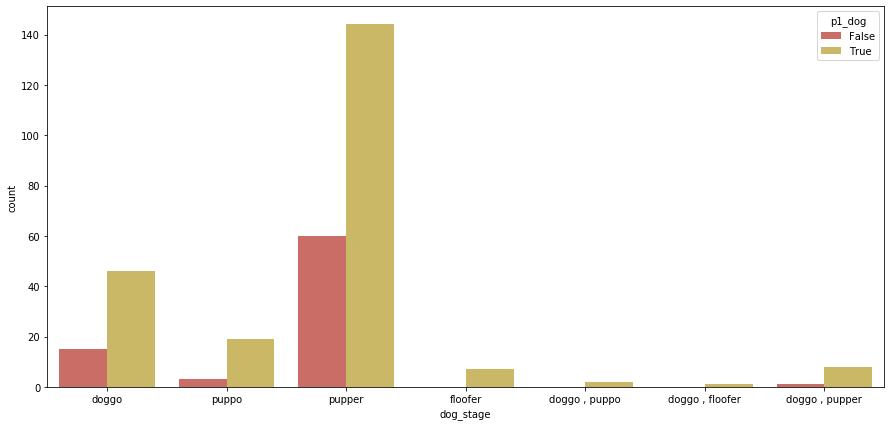

In [111]:
count_plot(df_clean, 'dog_stage', 'p1_dog')

In [1865]:
## we  can clearly see that about 400 pictures were classified as not dogs 

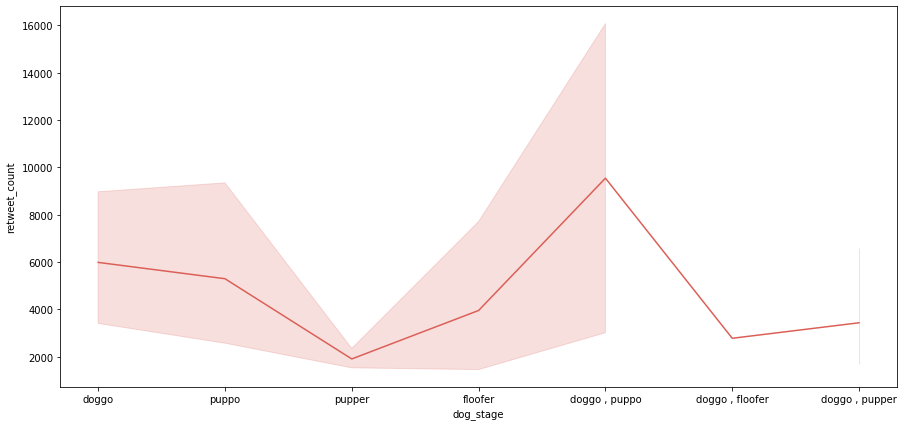

In [112]:
line_plot(df_clean, 'dog_stage', 'retweet_count')


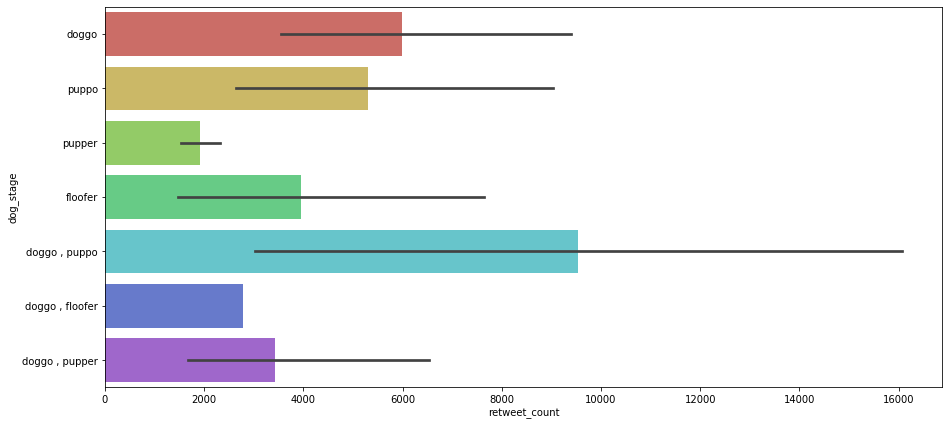

In [113]:
bar_plot(df_clean, 'retweet_count', 'dog_stage')


In [114]:
## floofer had the highest number of retweet_count while pupper had the lowest retweet_count

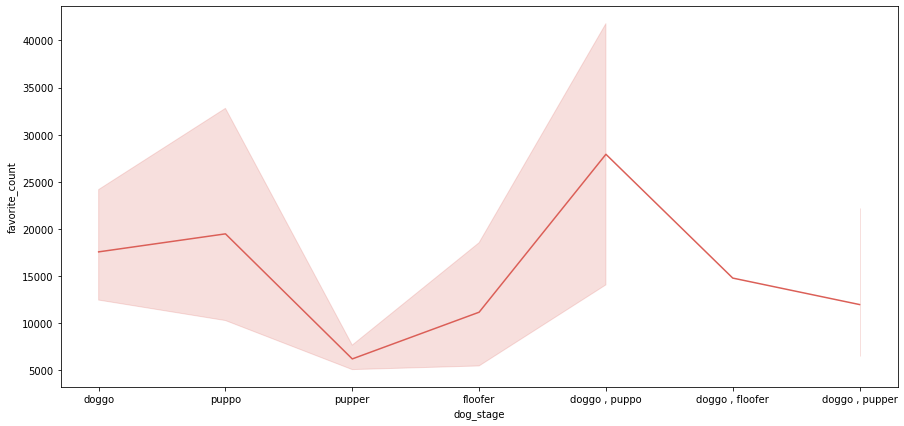

In [115]:
line_plot(df_clean, 'dog_stage', 'favorite_count')


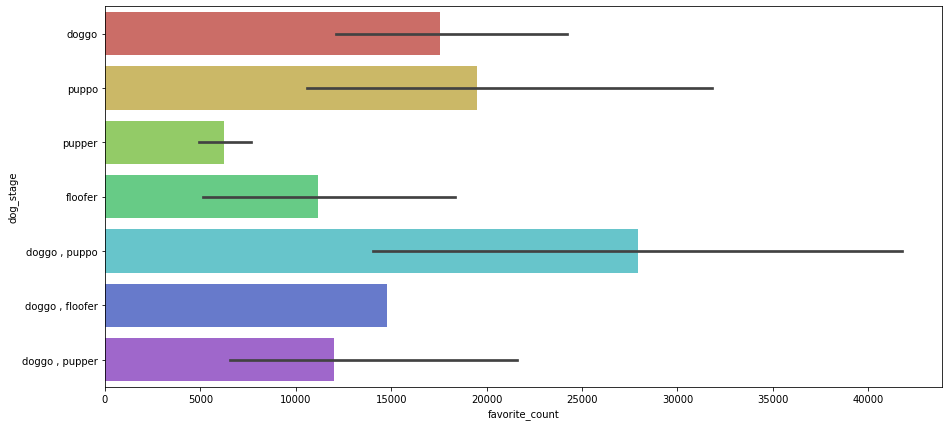

In [116]:
bar_plot(df_clean, 'favorite_count', 'dog_stage')


In [117]:
## floofer and puppo hav the the highest favorite_count, while  pupper and None have the lowest favorite_count 

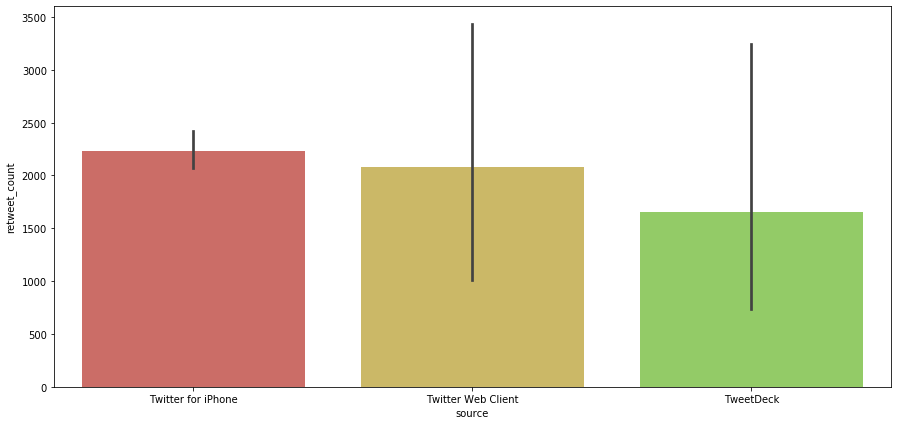

In [118]:
bar_plot(df_clean, 'source', 'retweet_count')


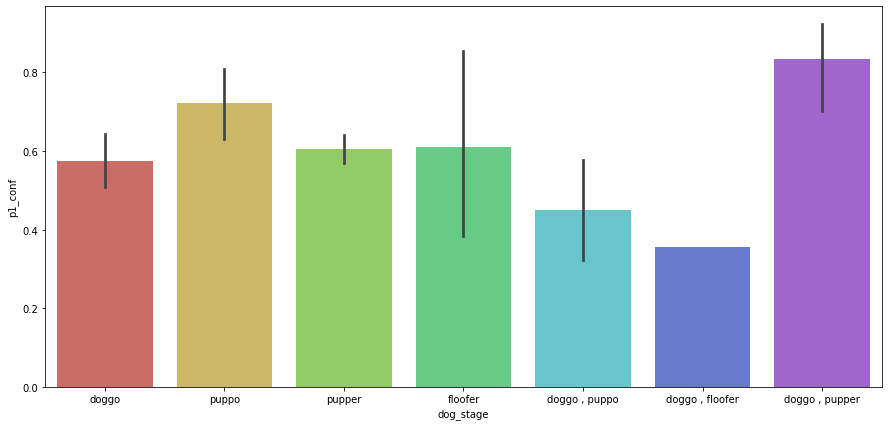

In [119]:
bar_plot(df_clean, 'dog_stage', 'p1_conf')


### predictions under the dog_stage floofer has the highest confidence interval

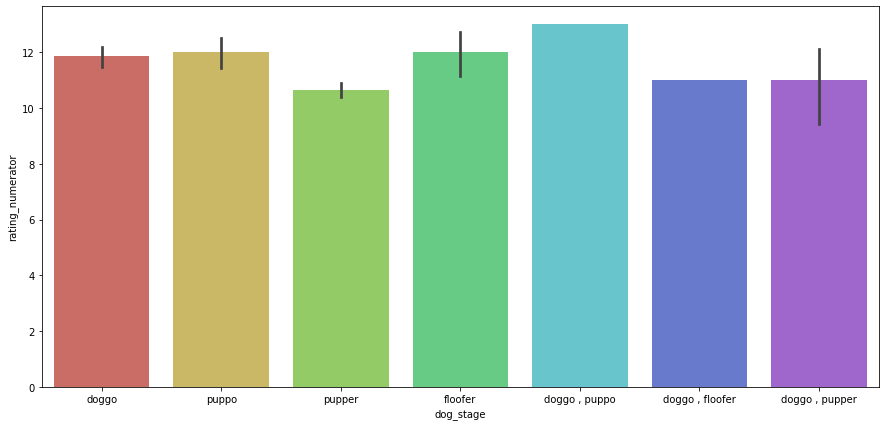

In [120]:
bar_plot(df_clean, 'dog_stage', 'rating_numerator')


### on average floofer has the highest average ratings

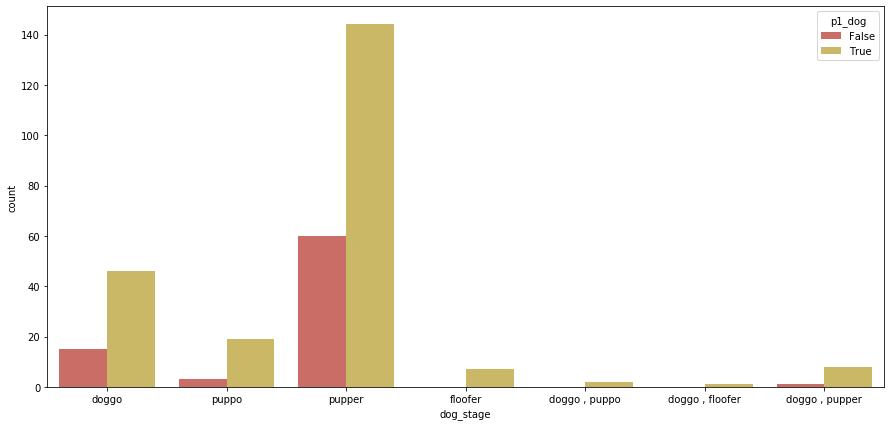

In [121]:
count_plot(df_clean, 'dog_stage', 'p1_dog')

In [122]:
df_higher =df_clean.query('p1_conf >= 0.6')


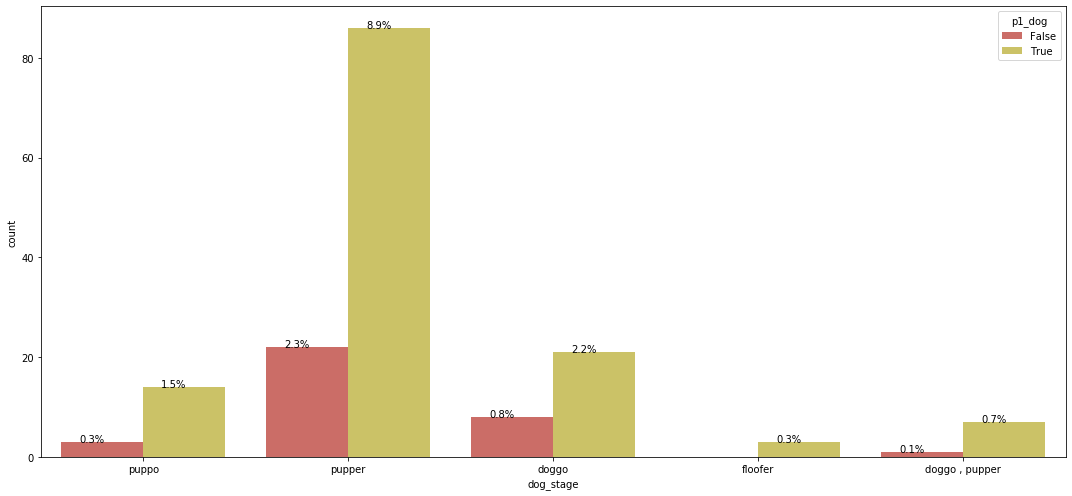

In [123]:
count_plot1(df_higher, 'dog_stage', 'p1_dog')


In [124]:
pred_lower=df_clean.query('p1_conf < 0.6')

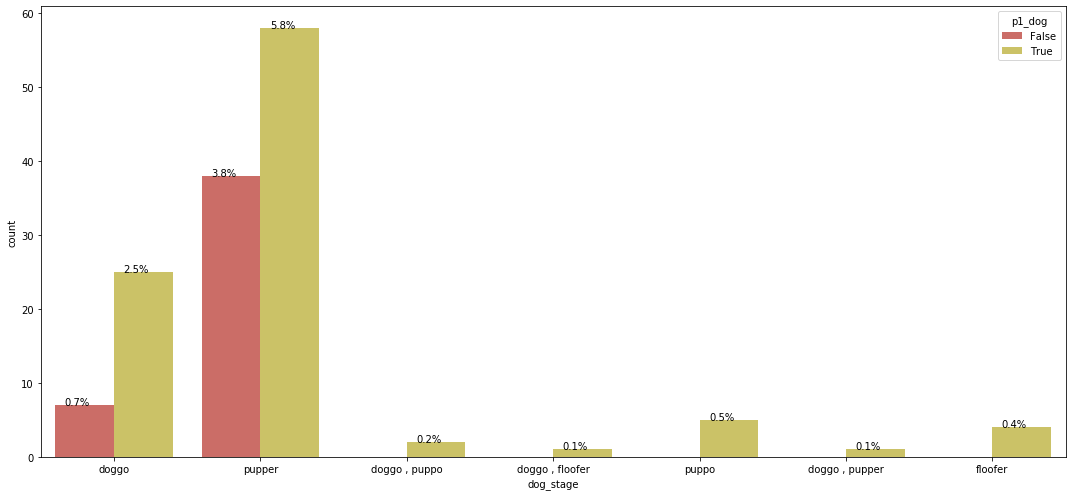

In [125]:
count_plot1(pred_lower, 'dog_stage', 'p1_dog')


In [130]:
## query data with p1_dog= False and name not == None
m_classified= df_clean.query("p1_dog == False").query("name!= 'None'")


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,NaN,33671,6962,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,NaN,36763,7190,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
21,887517139158093824,2017-07-19 03:39:09+00:00,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. Th...,14.0,10,none,NaN,40562,9802,1,Limousine,0.130432,False,Tow_truck,0.029175,False,Shopping_cart,0.026321,False
26,886680336477933568,2017-07-16 20:14:00+00:00,Twitter for iPhone,This is Derek. He's late for a dog meeting. 13...,13.0,10,Derek,NaN,19644,3717,1,Convertible,0.738995,False,Sports_car,0.139952,False,Car_wheel,0.044173,False
45,882045870035918850,2017-07-04 01:18:17+00:00,Twitter for iPhone,"This is Koko. Her owner, inspired by Barney, r...",13.0,10,Koko,NaN,25592,4061,1,Web_site,0.949591,False,Dhole,0.017326,False,Golden_retriever,0.006941,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,666411507551481857,2015-11-17 00:24:19+00:00,Twitter for iPhone,This is quite the dog. Gets really excited whe...,2.0,10,none,NaN,371,261,1,Coho,0.404640,False,Barracouta,0.271485,False,Gar,0.189945,False
1942,666337882303524864,2015-11-16 19:31:45+00:00,Twitter for iPhone,This is an extremely rare horned Parthenon. No...,9.0,10,none,NaN,167,79,1,Ox,0.416669,False,Newfoundland,0.278407,True,Groenendael,0.102643,True
1943,666293911632134144,2015-11-16 16:37:02+00:00,Twitter for iPhone,This is a funny dog. Weird toes. Won't come do...,3.0,10,none,NaN,424,288,1,Three-toed_sloth,0.914671,False,Otter,0.015250,False,Great_grey_owl,0.013207,False
1956,666057090499244032,2015-11-16 00:55:59+00:00,Twitter for iPhone,My oh my. This is a rare blond Canadian terrie...,9.0,10,none,NaN,247,111,1,Shopping_cart,0.962465,False,Shopping_basket,0.014594,False,Golden_retriever,0.007959,True


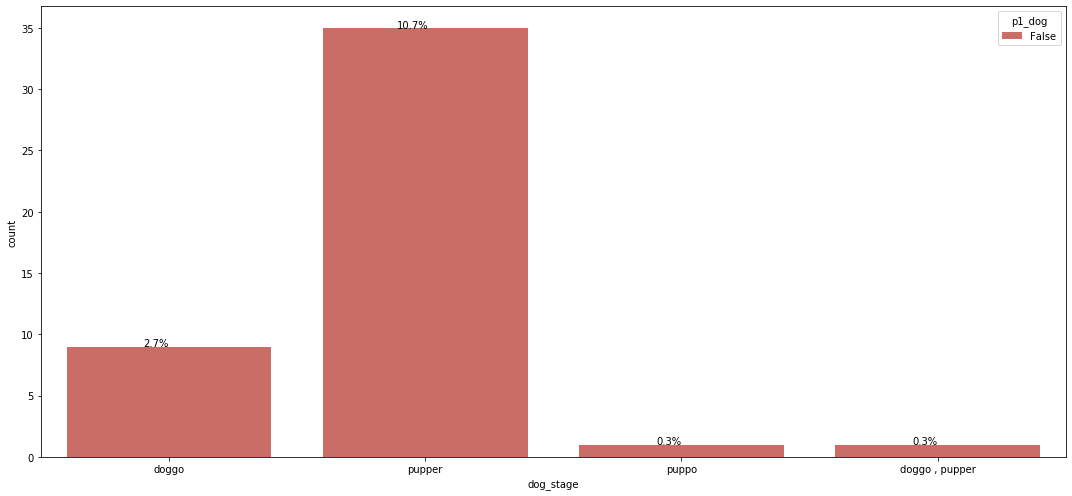

In [127]:
count_plot1(m_classified, 'dog_stage', 'p1_dog')


In [128]:
###  we can see the p1 algorithm is missclassifying over 14% data

In [1883]:
corr_plot(df_clean, 'favorite_count', 'retweet_count')

#### Favorite_count and retweet_count are highly correlated , so they could be use interchangebly as a metric for finding the users favortie dog  on we rate dogs